<a href="https://colab.research.google.com/github/javaidiqbal11/depression-detection-using-data-mining-association/blob/main/main_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Depression Detection in Tweets using Data Mining and Machine Learning Approaches

- The objective of this project is to investigate how Tweets
- Popular social media platform like twitte can be leveraged in detecting early risk of depression of the users. <br>
- Data Mining approches helps to analyze the depressed peoples. 
- Association Mining is also the solution that gives the rules from the dataset. 

**Mount your Google Drive with Google Colaboratory** <br>

*This needs to connect every time when we run the code.*



In [ ]:
# execute this cell to mount google drive with google colaboratory 

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


# Knowledge Discovery Analysis (KDA)
- To see insights the dataset we use different approaches to show the dataset insights<br>
- Visualize the dataset to check which techniques need to apply
- Show dataset strength and colum x rows 

**Step_1: Exploratory Data Analysis (EDA)**

**Required Libraries** <br>
*Install and Import all required libraries*

In [ ]:
# install these required libraries 

!pip install nltk  
!pip install wordcloud
!pip install tweet-preprocessor

In [ ]:
# import these required libraries 

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer

from wordcloud import WordCloud

import preprocessor as p

#from gensim.models import KeyedVectors

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# load the source_code directory which contains dataset and code files
data_dir = "/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code"

In [ ]:
# show all availabe files and directories in the current directroy 
!ls {data_dir}

contractions.json		 GoogleNews-vectors-negative300.bin.gz
dataset.csv			 main_file.ipynb
datasets.csv			 training.1600000.processed.noemoticon.csv
depressive_tweets_processed.csv


**Dataset Analysis** <br>
- This phase gives insights the dataset and shows the data streams.
- Data streams are shown using some techniques that gives the concept to implement the association mining

**Dataset Source**

- Twitter open-source dataset available here [Sentiment140](https://www.kaggle.com/kazanova/sentiment140). <br>
- Dataset columns are *target, id, date, flag, user and text*. 

In [ ]:
# read the dataset (.csv file read in python)
encoding = 'ISO-8859-1'
col_names = ['target', 'id', 'date', 'flag', 'user', 'text']

dataset = pd.read_csv(os.path.join(data_dir, '/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code/training.1600000.processed.noemoticon.csv'), encoding=encoding, names=col_names)

In [ ]:
# show first five rows from top of the data file including content of the dataset file 
dataset.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# show bottom five rows content from the dataset file 
dataset.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
# show all rows and columns content in the dataset file 
# the dataset has 1600000 rows × 6 columns
dataset

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# check null values in the dataset 
dataset.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
dataset.target.unique()

array([0, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


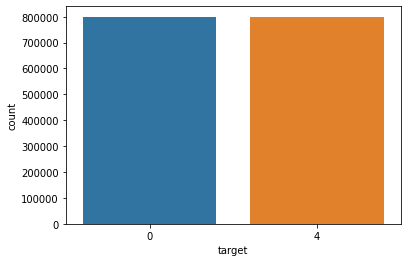

In [ ]:
# show ratio for label 0 and lable 4 in whole dataset
sns.countplot(dataset.target)

The actual dataset is very large and for this experiment, we took a random sample of **8000 tweets** from this given dataset. 

In [ ]:
# sample data used for the experiment which is 80000 tweets 
df = dataset.copy().sample(8000, random_state=42)  # this number of tweets can be changed accordign to the requirements 
df["label"] = 0
df = df[['text', 'label']]
df.dropna(inplace=True)
df.head()

,text,label
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,0
750,"@misstoriblack cool , i have no tweet apps fo...",0
766711,@TiannaChaos i know just family drama. its la...,0
285055,School email won't open and I have geography ...,0
705995,upper airways problem,0


Since there is no readily available public dataset on depression, We found a dataset scraped by [Twint](https://github.com/twintproject/twint).  

In [ ]:
# read depressive tweets dataset
col_names = ['id', 'text']
df2 = pd.read_csv(os.path.join(data_dir, '/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code/depressive_tweets_processed.csv'), sep = '|', header = None, usecols = [0,5], nrows = 3200, names=col_names)

In [ ]:
# get the information about dataframe (df2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2345 non-null   object
 1   text    2313 non-null   object
dtypes: object(2)
memory usage: 36.8+ KB


In [ ]:
# show first top five rows content in the dataset file
df2.head()

,id,text
0,989292962323615744,The lack of this understanding is a small but ...
1,989292959844663296,i just told my parents about my depression and...
2,989292951716155392,depression is something i don't speak about ev...
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...


In [ ]:
# show bottom five rows content from the dataset file 
df2.tail()

,id,text
2340,989036568781389830,Many sufferers of depression aren't sad; they ...
2341,989036542898397185,No Depression by G Herbo is my mood from now o...
2342,989036488162766848,What do you do when depression succumbs the br...
2343,989036488158572544,Ketamine Nasal Spray Shows Promise Against Dep...
2344,989036462271287297,dont mistake a bad day with depression! everyo...


In [ ]:
# # show all rows and columns content in the dataset file 
# dataset has 2345 rows × 2 columns
df2

,id,text
0,989292962323615744,The lack of this understanding is a small but ...
1,989292959844663296,i just told my parents about my depression and...
2,989292951716155392,depression is something i don't speak about ev...
3,989292873664393218,Made myself a tortilla filled with pb&j. My de...
4,989292856119472128,@WorldofOutlaws I am gonna need depression med...
...,...,...
2340,989036568781389830,Many sufferers of depression aren't sad; they ...
2341,989036542898397185,No Depression by G Herbo is my mood from now o...
2342,989036488162766848,What do you do when depression succumbs the br...
2343,989036488158572544,Ketamine Nasal Spray Shows Promise Against Dep...


In [ ]:
# add "label" colum with value 1's becasue this depressed peoples data 
df2['label'] = 1
df2 = df2[['text', 'label']]

In [ ]:
# merge the dataset on normal tweets and depressive tweets
df = pd.concat([df,df2]) 

# shuffle the dataset
df = df.sample(frac=1)  

In [ ]:
# get the information about dataframe (df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12690 entries, 1427922 to 526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12626 non-null  object
 1   label   12690 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 297.4+ KB


In [ ]:
# show first top five rows content in the dataset file
df.head()

,text,label
1427922,@aquigley Now she'll NEVER hire me for a...,0
1386857,@TiernanDouieb I must be an influence on you b...,0
1003,@theintercept Is there anything that isn't jus...,1
316908,@Catfishers moshtix or www.venuetix.com.au bu...,0
2116,[Zicutake] Depression can be prevented by exer...,1


In [ ]:
# show bottom five rows content from the dataset file
df.tail()

,text,label
50,@Harald_Brinkhof 'Over eating tends to be a si...,1
1030819,Naps the whole day? arrgh but I did wake up to...,0
467511,On my way home. Feel sick (please no) learnin...,0
1642,"If you don't think your anxiety, depression, s...",1
526,Be sure to check out our #podcast this Saturda...,1


In [ ]:
# # show all rows and columns content in the dataset file 
# Dataset has 10345 rows × 2 columns
df

,text,label
1427922,@aquigley Now she'll NEVER hire me for a...,0
1386857,@TiernanDouieb I must be an influence on you b...,0
1003,@theintercept Is there anything that isn't jus...,1
316908,@Catfishers moshtix or www.venuetix.com.au bu...,0
2116,[Zicutake] Depression can be prevented by exer...,1
...,...,...
50,@Harald_Brinkhof 'Over eating tends to be a si...,1
1030819,Naps the whole day? arrgh but I did wake up to...,0
467511,On my way home. Feel sick (please no) learnin...,0
1642,"If you don't think your anxiety, depression, s...",1


In [ ]:
df.label.unique()

array([0, 1])

[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

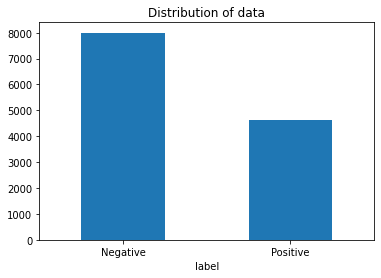

In [ ]:
# show positive and negative values of the dataset distribution
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [ ]:
# save the dataframe for future use to process
df.to_csv('/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code/dataset.csv')

# Step_2: Data Pre-Processing <br>
- Few pre-processing techniques to clean the dataset 
- The dataset couldn't used for processing due to noise or missing values
- Features are extracted based on the dataset type

In [ ]:
# read the contractions.json to store the data in dictionary 
contractions = pd.read_json(os.path.join(data_dir, '/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code/contractions.json'), typ='series')
contractions = contractions.to_dict()


In [ ]:
# compile the contractions here 
c_re = re.compile('(%s)' % '|'.join(contractions.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return contractions[match.group(0)]
    return c_re.sub(replace, text)

In [ ]:
# during preprocessing compile and remove the unnecessary cntent from dataset 
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        tweet = tweet.lower()
        tweet = BAD_SYMBOLS_RE.sub(' ', tweet)
        tweet = p.clean(tweet)
        
        #expand contraction
        tweet = expandContractions(tweet)

        #remove punctuations
        tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())

        #stop words
        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet) 
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        tweet = ' '.join(filtered_sentence)
        
        cleaned_tweets.append(tweet)
        
    return cleaned_tweets

In [ ]:
# import the nltk which is language based librayr here 
# download the stopwords from the library 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# import library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# clean the given tweets dataset 
X = clean_tweets([tweet for tweet in df['text']])

In [ ]:
# saving the dataframe for Data Mining Association 
df.to_csv('/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code/dataset.csv')

**Word Analysis (WordCloud)** <br>
- This shows the most occuring words in the dataset. <br>
- We can see there will be some words relate to the depression <br>
- Some words will be shown in the figure with positive such as happy etc. 

In [ ]:
# get the depressive tweets and then ge the depressive specific words  
# aplly word cloud which shows the depressive words in visuals 
depressive_tweets = [clean_tweets([t for t in df2['text']])]
depressive_words = ' '.join(list(map(str, depressive_tweets)))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)

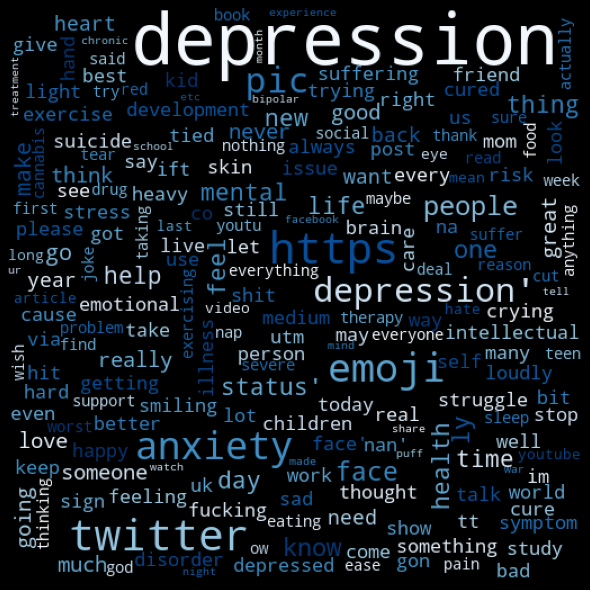

In [ ]:
# plot the depressive words in wordcloud 
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

It's easy to spot words that are indicative of depression in these tweets such that:
- depression 
- treatment 
- suffering
- crying
- help 
- struggle
- risk
- hate
- sad
- anxiety
- disorder
- suicide
- stress
- therapy
- mental health
- emotional 
- bipolar, etc.

**Word Tokenization** <br>
1.  This gives the tokens means to divide the whole sentences into tokens (words).
2. using these tokens we apply the techniques to get the most depressed words. 




In [ ]:
# tokenize the whole data into number of tokens 
MAX_NUM_WORDS = 10000
tokenizer= Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X)

In [ ]:
# calculate the word vector here 
word_vector = tokenizer.texts_to_sequences(X)

In [ ]:
# get the  word indexes 
word_index = tokenizer.word_index

In [ ]:
# vocabulary size for the words 
vocab_size = len(word_index)
vocab_size   # num of unique tokens

20670

In [ ]:
# sequence length defined 140 
MAX_SEQ_LENGTH = 140
input_tensor = pad_sequences(word_vector, maxlen=MAX_SEQ_LENGTH)

In [ ]:
# tesnor input shape 
input_tensor.shape

(10345, 140)

# Step 3: Association Mining Rules

**Association Mining using Apriori Algorithm**
- Apriori algorithm used to apply the association mining rules
- Sample dataset used from whole dataset 
- This dataset pre-processed and prepared using different techniques 
- Most occureing words are extracted from the whole datset and used to apply the association mining rules 
- Tweets emoji's are expressed in text form to use in the model 

In [ ]:
# install the apyori library first 
!pip install apyori

In [ ]:
# import these required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [ ]:
# load the dataset for association rule mining process 
store_data = pd.read_csv("/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code/datasets.csv", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4
0,irony,plane,sister,drives,undepressed
1,booster,open,NaN,juice,undepressed
2,tired,puff,depression,stress,depressed
3,think,time,NaN,hands,undepressed
4,happy,thanks,NaN,NaN,undepressed


(125, 5)


In [ ]:
#dataset information 
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       125 non-null    object
 1   1       111 non-null    object
 2   2       52 non-null     object
 3   3       76 non-null     object
 4   4       119 non-null    object
dtypes: object(5)
memory usage: 5.0+ KB


In [ ]:
# Data cleaning step and replacing empty value with 0 value (NAN replaced with 0) 
store_data.fillna(0,inplace=True)

In [ ]:
#save all the loaded data into records variable
records = []
for i in range(1, 125):
    records.append([str(store_data.values[i, j]) for j in range(0, 5)])

In [ ]:
#records type is class and named list
print(type(records))

<class 'list'>


In [ ]:
#apply association rule mining algorithm apriori and set parameter values 
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=3)
association_results = list(association_rules)

In [ ]:
#print all the realtions generated in dataset applying apriori 
print("There are {} Relation derived.".format(len(association_results)))

There are 486 Relation derived.


In [ ]:
#association results are shown
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'dream', 'TRUE'})
frozenset({'successful', 'TRUE'})
frozenset({'dark', 'anger'})
frozenset({'depressed', 'anger'})
frozenset({'tired', 'anger'})
frozenset({'unhappy', 'anger'})
frozenset({'anxiety', 'depressed'})
frozenset({'anxiety', 'serious'})
frozenset({'anxiety', 'unhappy'})
frozenset({'beautiful', 'awesome'})
frozenset({'watch', 'awesome'})
frozenset({'watch', 'beautiful'})
frozenset({'beauty', 'dye hair'})
frozenset({'wish', 'birthday'})
frozenset({'booster', 'juice'})
frozenset({'booster', 'open'})
frozenset({'cause', 'bye'})
frozenset({'right', 'bye'})
frozenset({'weekend', 'bye'})
frozenset({'mom', 'caption'})
frozenset({'caption', 'nothing'})
frozenset({'thinking', 'caption'})
frozenset({'right', 'cause'})
frozenset({'weekend', 'cause'})
frozenset({'caves', 'down'})
frozenset({'caves', 'nightwear'})
frozenset({'caves', 'worst'})
frozenset({'chill', 'smiley'})
frozenset({'confuse', 'depressed'})
frozenset({'confuse', 'silly'})
frozenset({'depresssed', 'could ease d

In [ ]:
#show all the generated rules 
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: dream -> TRUE
Support: 0.008064516129032258
Confidence: 1.0
Lift: 124.0
Rule: successful -> TRUE
Support: 0.008064516129032258
Confidence: 1.0
Lift: 124.0
Rule: dark -> anger
Support: 0.008064516129032258
Confidence: 1.0
Lift: 124.0
Rule: depressed -> anger
Support: 0.008064516129032258
Confidence: 1.0
Lift: 3.1
Rule: tired -> anger
Support: 0.008064516129032258
Confidence: 1.0
Lift: 4.769230769230769
Rule: unhappy -> anger
Support: 0.008064516129032258
Confidence: 1.0
Lift: 41.333333333333336
Rule: anxiety -> depressed
Support: 0.04032258064516129
Confidence: 1.0
Lift: 3.1
Rule: anxiety -> serious
Support: 0.024193548387096774
Confidence: 0.6
Lift: 24.8
Rule: anxiety -> unhappy
Support: 0.016129032258064516
Confidence: 0.4
Lift: 16.533333333333335
Rule: beautiful -> awesome
Support: 0.008064516129032258
Confidence: 1.0
Lift: 124.0
Rule: watch -> awesome
Support: 0.008064516129032258
Confidence: 1.0
Lift: 124.0
Rule: watch -> beautiful
Support: 0.008064516129032258
Confidence: 1.

# Step_4: Classify using Data Mining and Machine Learning <br>
There are important steps required to apply the Machine Learnig algorithms

**TF-IDF Features Extraction** <br>
- TF-IDF is the statistical features used to extract
- These resulted feature vector used for the classification 

In [ ]:
# feature extraction such as TFIDF 
corpus = df['text'].values.astype('U')
tfidf = TfidfVectorizer(max_features = MAX_NUM_WORDS) 
tdidf_tensor = tfidf.fit_transform(corpus)


In [ ]:
tdidf_tensor.shape

(10345, 10000)

**Split train and test dataset**

In [ ]:
# Split data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(tdidf_tensor, df['label'].values, test_size=0.3)


In [ ]:
# baseline model such as SVM 
baseline_model = SVC()
baseline_model.fit(x_train, y_train)

SVC()

In [ ]:
predictions = baseline_model.predict(x_test)

In [ ]:
accuracy_score(y_test, predictions)

0.9958118556701031

**LSTM Classification Model**

Let's improve our model with LSTM algorithm. 

**Word Embedding**

In [ ]:
# embed file for the testing tweets fromthe GoogleNews 
EMBEDDING_FILE = os.path.join(data_dir, '/content/drive/MyDrive/Merna_Client/Depression_Detection/Source_Code/GoogleNews-vectors-negative300.bin.gz')
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)


In [ ]:
# embedding dimension is set here 
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))

In [ ]:
# feature extraction word2vector 

for (word, idx) in word_index.items():
    if word in word2vec.vocab and idx < MAX_NUM_WORDS:
        embedding_matrix[idx] = word2vec.word_vec(word)

**Model Training**

In [ ]:
# model training 
inp = Input(shape=(MAX_SEQ_LENGTH,))
x = Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(100, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(1, activation="sigmoid")(x)

In [ ]:
# compile the model
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Split data into training and testing sets (70% Training and 30% Testing)
x_train, x_test, y_train, y_test = train_test_split(input_tensor, df['label'].values, test_size=0.3)

**Set the parameters adnd train model**

In [ ]:
# set parameters for the training such as epochs 
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
453/453 [==============================] - 781s 2s/step - loss: 0.0808 - accuracy: 0.9732
Epoch 2/10
453/453 [==============================] - 762s 2s/step - loss: 0.0202 - accuracy: 0.9959
Epoch 3/10
453/453 [==============================] - 753s 2s/step - loss: 0.0066 - accuracy: 0.9983
Epoch 4/10
453/453 [==============================] - 735s 2s/step - loss: 0.0026 - accuracy: 0.9994
Epoch 5/10
453/453 [==============================] - 758s 2s/step - loss: 0.0023 - accuracy: 0.9994
Epoch 6/10
453/453 [==============================] - 755s 2s/step - loss: 0.0022 - accuracy: 0.9994
Epoch 7/10
453/453 [==============================] - 746s 2s/step - loss: 0.0019 - accuracy: 0.9994
Epoch 8/10
453/453 [==============================] - 749s 2s/step - loss: 0.0022 - accuracy: 0.9994
Epoch 9/10
453/453 [==============================] - 742s 2s/step - loss: 0.0019 - accuracy: 0.9994
Epoch 10/10
453/453 [==============================] - 722s 2s/step - loss: 0.0021 - accura

In [ ]:
# test the model and save in preds varible 
preds = model.predict(x_test)

In [ ]:
preds  = np.round(preds.flatten())
print(classification_report(y_test, preds, digits=5))

              precision    recall  f1-score   support

           0    0.99538   0.99372   0.99455      2387
           1    0.97920   0.98466   0.98192       717

    accuracy                        0.99162      3104
   macro avg    0.98729   0.98919   0.98823      3104
weighted avg    0.99164   0.99162   0.99163      3104



**Machine Learning Models**

**1- Naive Baye's**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, df.label, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.9007731958762887
              precision    recall  f1-score   support

           0    0.88636   0.99874   0.93920      2382
           1    0.99286   0.57756   0.73030       722

    accuracy                        0.90077      3104
   macro avg    0.93961   0.78815   0.83475      3104
weighted avg    0.91113   0.90077   0.89061      3104



**2- Linear Support Vector**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
# evaluated results using SVM classifier 

print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99501   0.99958   0.99729      2393
           1    0.99857   0.98312   0.99079       711

    accuracy                        0.99581      3104
   macro avg    0.99679   0.99135   0.99404      3104
weighted avg    0.99582   0.99581   0.99580      3104



In [ ]:
y_pred = sgd.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.9838917525773195
              precision    recall  f1-score   support

           0    0.98023   0.99916   0.98960      2382
           1    0.99704   0.93352   0.96423       722

    accuracy                        0.98389      3104
   macro avg    0.98864   0.96634   0.97692      3104
weighted avg    0.98414   0.98389   0.98370      3104



**3- Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [ ]:
y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.970360824742268
              precision    recall  f1-score   support

           0    0.98765   0.97355   0.98055      2382
           1    0.91667   0.95983   0.93775       722

    accuracy                        0.97036      3104
   macro avg    0.95216   0.96669   0.95915      3104
weighted avg    0.97114   0.97036   0.97060      3104



**4- Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rend = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_jobs=1, random_state=0))])
rend.fit(x_train, y_train) 

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_jobs=1, random_state=0))])

In [ ]:
y_pred = tre.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.9874355670103093
              precision    recall  f1-score   support

           0    0.98429   0.99958   0.99188      2382
           1    0.99854   0.94737   0.97228       722

    accuracy                        0.98744      3104
   macro avg    0.99142   0.97347   0.98208      3104
weighted avg    0.98761   0.98744   0.98732      3104



**5- Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tre = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0, max_depth=2))])
tre.fit(x_train, y_train) 

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=0))])

In [ ]:
y_pred = rend.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=5))

accuracy 0.9552190721649485
              precision    recall  f1-score   support

           0    0.99340   0.94794   0.97014      2382
           1    0.85078   0.97922   0.91050       722

    accuracy                        0.95522      3104
   macro avg    0.92209   0.96358   0.94032      3104
weighted avg    0.96023   0.95522   0.95627      3104



The overall KDD process implemented where during the development we uses Association Rule Mining Algorithm and Machine Learning Algorithms to classify the depressed and undepressed tweets. 